# Challenge 01: Particle Counting
The Timepix hybrid silicon pixel detector is an impressive bit of kit. Developed at [CERN](http://home.cern) by the [Medipix Collaboration](http://medipix.web.cern.ch/), and used in the Large Hadron Collider (LHC), it can detect and visualise ionising radiation in real time. In this challenge, we will use code to count and identify different types of radiation emitted by a radioactive notebook at the Royal Institution of Great Britain.
<br />
<img src='./assets/images/ri_crookes_notebook_setup.jpg' style='width: 256px' />
<p style='text-align:center;'><em>Figure 1: A CERN@school MX-10 detector (left) mounted above one of William Crookes' notebooks at the Royal Institution of Great Britain. You can also see a Geiger counter to the right</em>.</p>

Ionising radiation, such as alphas (helium nuclei), betas (electrons and positrons) and gammas (photons), registers as different patterns of pixels in each frame of data. The pixel information is recorded in a text file with the _x_ and _y_ position of the hit on the sensor and the count value `C` of the hit, which is related to the energy of the radiation.

We have provided data from a frame recorded _in one second_ from the above experimental setup. We can read this data into Python as follows:

In [1]:
# Import the data analysis tools we need from the Pandas toolkit.
import pandas as pd

## Our pixel data stored as a Panda DataFrame.
df000 = pd.read_table('./data/crookes/data000.txt', header=None, names=["x", "y", "C"])

# Show the first five rows of pixel data.
df000.head()

,x,y,C
0,24,9,60
1,25,9,27
2,24,10,47
3,25,10,55
4,26,10,1


The `DataFrame` object provides a convenient wrapper for the pixel data read from the raw text file the detector produced. For example, we can find out how many pixels there are in total in the frame:

In [2]:
print("There are %d pixels in the data frame." % (len(df000)))

There are 735 pixels in the data frame.


Of course, what we're really interested in is what the pixels look like as a whole so we can see the patterns and start to identify what has been detected. We've written some code to do this for you:

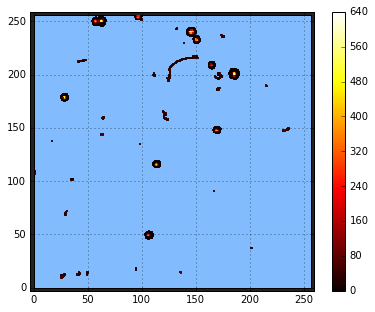

In [3]:
# Import a function that extracts a pixel dictionary from the data frame.
from cernatschool.helpers import get_pixel_dictionary_from_dataframe

# Import a function that makes an image from a pixel dictionary.
from cernatschool.visualisation import make_frame_image

# (This line just allows us to show images as we go...)
%matplotlib inline

## The pixel dictionary - contains the pixel information in the format {X:C}.
pixel_dict = get_pixel_dictionary_from_dataframe(df000)

# Make the frame image from the pixel dictionary.
make_frame_image(pixel_dict)

And there you go! A 256 x 256 pixel image of the radiation detected in one second of recording data from above Crookes' notebook. The colours indicate how much energy was deposited in each pixel using the scale on the right of the image.

In [4]:
# Exercise 1: Manual particle counting
#
# How many particles can you count in the above image? Write your answer below.
#
#

Now, you should be able to make out three sorts of **clusters** - groups of pixels adjacent pixels - in the image, corresponding to the three types of radiation we'd expect to see from this measurement.

Firstly, there are the **alphas**. Alpha radiation consists of helium nuclei - two protons and two neutrons with an overall charge of 2+. These deposit large amounts of energy in the detector. To cut a long story short, this results in many pixels being activated over a large area in the image, resulting in "blobs"  like these:

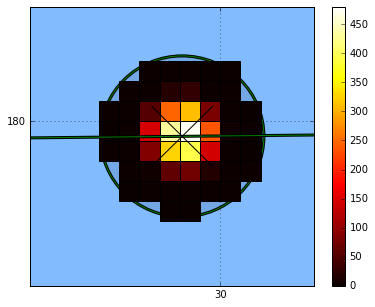

In [5]:
# Find the clusters - groups of adjacent pixels - in the data.
from cernatschool.kluster import KlusterFinder

# Get one of the alpha clusters.
alpha_cluster_1 = KlusterFinder(pixel_dict, 256, 256).getListOfKlusters()[4]

# Import a function for making an image of just one cluster.
from cernatschool.visualisation import make_kluster_image

# Make the image.
make_kluster_image(alpha_cluster_1)

Notice too how all of the energy is centred in the middle of the cluster.

Secondly, we have **beta** radiation - electrons and positrons - that scatters through the silicon of the detector leaving curly tracks of pixels like in the following cluster:

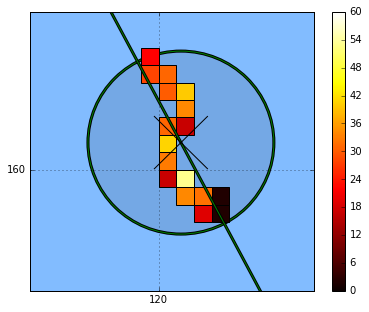

In [6]:
# An example of a beta cluster from the data.
beta_cluster_1 = KlusterFinder(pixel_dict, 256, 256).getListOfKlusters()[11]

# Make the image!
make_kluster_image(beta_cluster_1)

Finally, we have **gamma** radiation - photons that set off single pixels, or two, three of four when they hit the boundaries between pixels:

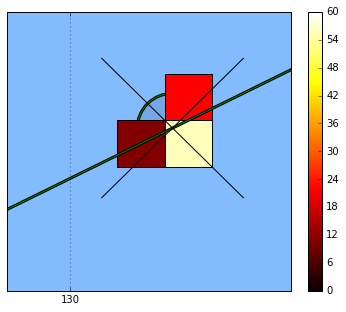

In [7]:
# An example of a tripixel gamma candidate.
gamma_cluster_1 = KlusterFinder(pixel_dict, 256, 256).getListOfKlusters()[25]

# Make the image!
make_kluster_image(gamma_cluster_1)

We can use the `KlusterFinder` Python object to find the clusters of pixels in the data, and the `make_kluster_image` function to make an image of the cluster that lets us look at it in more detail. Why not try looking at more clusters yourself?

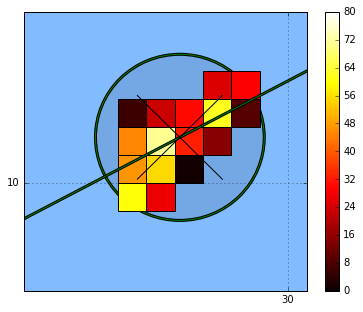

In [8]:
# Exercise 2: Making your own cluster images
#
# Use code like the following to make your own cluster images from the data!
#
# First, let's make a Python list of the clusters:

klusters = KlusterFinder(pixel_dict, 256, 256).getListOfKlusters()

# We can now make an image by specifying the index in the list.
# Try changing the number 12 to another number to see the different
# clusters!

make_kluster_image(klusters[12])

It's fun to make the pictures of the clusters, but we can actually use code to do some important - but, dare we say, tedious - work for us. For example, how did you get on with the particle counting in Exercise 1? Our code makes tasks like this a lot easier...

In [9]:
print("Number of clusters (particle) in the data frame: %d" % (len(klusters)))

Number of clusters (particle) in the data frame: 34


Did you get it right?

Now, it turns out `KlusterFinder` is a bit cleverer than just counting the particles. It also does a bunch of calculations on the clusters that tell us something about the clusters themselves. For example, it calculates:

* The **size** of the cluster (the number of pixels in the cluster);
* The **position** of the centre of the cluster;
* The **radius** of the cluster (the distance from the centre to the furthest pixel from the centre);
* The **density** of the cluster (the number of pixels divided by the area of the circle defined by the cluster radius);
* Whether or not the cluster is on the edge of the frame;
* The fraction of pixels completely surrounded by other pixels in the cluster.

We can make a `DataFrame` of these properties of the clusters and present it as a table:

In [10]:
# Import a function that makes a DataFrame of kluster information.
from cernatschool.helpers import get_dataframe_of_klusters

## The cluster DataFrame.
kdf = get_dataframe_of_klusters(klusters)

# Show the whole table, representing all 34 clusters.
kdf

,size,x_uw,y_uw,radius_uw,density_uw,isedgekluster,innerfrac
0,104,146.673077,237.375000,8.550607,0.452782,False,0.451923
1,92,59.771739,250.130435,6.772995,0.638376,False,0.543478
2,73,184.657534,200.698630,5.056112,0.908949,False,0.520548
3,63,132.571429,208.142857,20.033645,0.049966,False,0.000000
4,50,27.620000,178.740000,4.036335,0.976890,False,0.440000
5,48,112.750000,116.000000,3.881044,1.014365,False,0.458333
6,44,163.863636,208.909091,3.911469,0.915426,False,0.431818
7,43,105.651163,49.325581,3.712927,0.992855,False,0.372093
8,39,168.538462,148.102564,3.575981,0.970788,False,0.384615
9,26,96.192308,253.384615,3.683684,0.609900,True,0.230769


That's quite a lot of information to take in - but you can use code to help. Want to find only the particles above a certain size? No problem.

In [11]:
## Let's look for particles with a minimum size of 50 pixels.
min_size = 50

# Apply a filter to the table using the `loc` method and a conditional statement.
kdf.loc[kdf['size'] >= min_size]

,size,x_uw,y_uw,radius_uw,density_uw,isedgekluster,innerfrac
0,104,146.673077,237.375000,8.550607,0.452782,False,0.451923
1,92,59.771739,250.130435,6.772995,0.638376,False,0.543478
2,73,184.657534,200.698630,5.056112,0.908949,False,0.520548
3,63,132.571429,208.142857,20.033645,0.049966,False,0.000000
4,50,27.620000,178.740000,4.036335,0.976890,False,0.440000


Which particles are on the edge of the frame?

In [12]:
kdf.loc[(kdf['isedgekluster']==True)]

,size,x_uw,y_uw,radius_uw,density_uw,isedgekluster,innerfrac
9,26,96.192308,253.384615,3.683684,0.60990,True,0.230769
24,3,0.000000,108.000000,1.000000,0.95493,True,0.000000


Which we can check with:

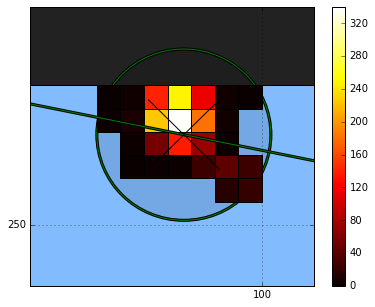

In [13]:
make_kluster_image(klusters[9])

We can also combine our search criteria by using boolean operators in the `loc` method like so:

In [14]:
## The minimum particle size.
min_size = 25

## The minimum density.
min_density = 0.5

# Find clusters that aren't on the edge, have a minimum size of 25 pixels and
# a minimum density of 0.8 using multiple conditions linked by AND & operators.
kdf.loc[(kdf['isedgekluster']==False ) & ((kdf['size'] >= min_size) & (kdf['density_uw'] >= min_density))]

,size,x_uw,y_uw,radius_uw,density_uw,isedgekluster,innerfrac
1,92,59.771739,250.130435,6.772995,0.638376,False,0.543478
2,73,184.657534,200.698630,5.056112,0.908949,False,0.520548
4,50,27.620000,178.740000,4.036335,0.976890,False,0.440000
5,48,112.750000,116.000000,3.881044,1.014365,False,0.458333
6,44,163.863636,208.909091,3.911469,0.915426,False,0.431818
7,43,105.651163,49.325581,3.712927,0.992855,False,0.372093
8,39,168.538462,148.102564,3.575981,0.970788,False,0.384615


In [15]:
# Exercise 3: Particle spotting
#
# Use the make_kluster_image function to examine these particles more closely.
#
# What do you notice?

Hmm... so we seem to be able to sort the particles into groups by requiring that they meet certain criteria. We can make use of this to automatically create lists of clusters that represent these groups, and then count them:

In [16]:
## A list of big particles!
big_clusters = []

# Loop over the clusters.
for kluster in klusters:
    # Apply the cut on cluster size.
    if kluster.getNumberOfPixels() > 50:
        # If it passes, add it to the list!
        big_clusters.append(kluster)
        
print("%d big clusters found!" % (len(big_clusters)))

4 big clusters found!


In [17]:
# Exercise 4: Checking our working
#
# Use the DataFrame of clusters to check that there are indeed four "big clusters"
# as defined here.

The other methods to get the cluster properties from a cluster are:

* `getNumberOfPixels()` - the cluster size;
* `getRadiusUW()` - the cluster radius;
* `getDensityUW()` - the cluster density;
* `getInnerPixelFraction()` - the fraction of pixels that are completely surrounded by other pixels;
* `isEdgeCluster()` - returns True if the cluster is on the edge of the frame.

So we can use multiple `if` statements and these values to sort the clusters in our `for` loop.

In [18]:
# Exercise 5: GRAND CHALLENGE - COUNT THE ALPHAS, BETAS, AND GAMMAS
#
# Can you come up with a for loop containing a series of if statements
# that will sort the clusters into four lists?
#
# We've made a start for you here - good luck!

## A list of single alpha particles.
alphas = []

## A list of beta particles.
betas = []

## A list of gammas.
gammas = []

## A list of "other" particles.
others = []

# Add to the loop here:

for kluster in klusters:
    # Dummy if statement - you can do better!
    if kluster.getNumberOfPixels() >= 1:
        alphas.append(kluster)
        
print("Number of alphas   = % 3d" % (len(alphas)))
print("Number of betas    = % 3d" % (len(betas)))
print("Number of gammas   = % 3d" % (len(gammas)))
print("Number of 'others' = % 3d" % (len(others)))
print("------------------------")
print("TOTAL              = % 3d" % (len(alphas) + len(betas) + len(gammas) + len(others)))

Number of alphas   =  34
Number of betas    =   0
Number of gammas   =   0
Number of 'others' =   0
------------------------
TOTAL              =  34
